In [13]:
import tensorflow.keras
# keras.__version__

In [14]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# mnist 파일을 로드하여 훈련 세트와 데스트 세트를 구성

In [15]:
print("x,y,z:",train_images.shape)
# 3D 텐서이므로 (행,열,차원)값이 출력 x,y,z의 축으로 받아들여도 무방할듯 함\

print("전체 데터의 수(행):",len(train_labels))
# 전체 데이터의 갯수를 확인

print(train_labels)

x,y,z: (60000, 28, 28)
전체 데터의 수(행): 60000
[5 0 4 ... 5 6 8]


In [16]:
# test 데이터

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


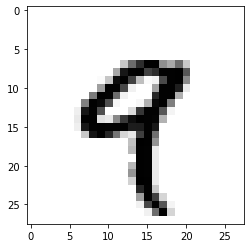

In [17]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
# 작업 순서
# 훈련 데이터 train_images 와 train_labels 를 네트워크에 주입
# 이미지와 레이블을 연관시킬 수 있도록 학습
# test_images 에 대한 예측을 네트워크에게 요청
# 예측이 test_labels 과 맞는지 확인

In [19]:
from tensorflow.keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# 연속되는 두 개의 층으로 되어 있음
# 마지막 층은 10개의 확률 점수가 들어 있는 배열 (모두 더하면 1)을 반환하는 softmax 층
# 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률

In [20]:
network.compile(
     optimizer='rmsprop',
     loss='categorical_crossentropy',
     metrics=['accuracy']
)

# 최적화 함수와 손실 함수를 선택하고 정확도를 위해 accuracy를 활용

In [21]:
# 훈련 시작 전 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정
# [0,255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기의 배열을
# 0 과 1 사이의 값을 가진 float32 타입의 (60000, 28 * 28) / 255 크기의 배열로 바꿈

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [22]:
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 레이블을 범주형으로 인코딩
# 후에 3장에서 자세하게 설명

In [23]:
# from tensorflow.keras import models, layers
# from tensorflow.keras.utils import to_categorical

# network = models.Sequential()
# network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# network.add(layers.Dense(10, activation='softmax'))

# network.compile(
#     optimizer='rmsprop',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype('float32') / 255

# test_images = test_images.reshape((10000, 28 * 28))
# test_labels = test_labels.astype('float32') / 255

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2562 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1026 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9889


In [24]:
# test_loss, test_acc = network.evaluate(test_images, test_labels)
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9755


In [25]:
test_acc

0.9754999876022339